In [22]:
import pandas as pd
import numpy as np

from scib_metrics.benchmark import Benchmarker
import scanpy as sc
adata = sc.read_h5ad('../H19.30.001.STG.4000.expand.rep1.h5ad')
bm = Benchmarker(
    adata,
    batch_key="perturbation",
    label_key="cell_type0528",
    embedding_obsm_keys=["harmony", "contrastivevi_bg", "no_pretraining", "base_ct"],
    pre_integrated_embedding_obsm_key='X_pca',
    n_jobs=6,
)


df = pd.read_csv('multiome/multiome_ct.csv',index_col=0)
df = df.drop(index='pcr_comparison')

df = df.drop(columns=['simvi_lz'+str(i) for i in range(10)])
df = df.drop(columns=['simvi_s'+str(i) for i in range(10)])

df = df.drop(columns='X_pca')

bm._results = df
df_ = bm.get_results(min_max_scale=False).T
df_ = df_.T


df2 = pd.read_csv('multiome/multiome_mpniche.csv',index_col=0)

df2 = df2.drop(columns=['simvi_lz'+str(i) for i in range(10)])
df2 = df2.drop(columns=['simvi_z'+str(i) for i in range(10)])

df2 = df2.drop(columns='X_pca')


df2 = df2.T
df2['tmp'] = 0
df2['tmp'][-1] = 'Batch correction'
df2 = df2.T

bm._results = df2
df2_ = bm.get_results(min_max_scale=False).T
df2_ = df2_.T

df3 = pd.read_csv('multiome/multiome_hypoxia.csv',index_col=0)

df3 = df3.drop(columns=['simvi_lz'+str(i) for i in range(10)])
df3 = df3.drop(columns=['simvi_z'+str(i) for i in range(10)])

df3 = df3.drop(columns='X_pca')

df3 = df3.T
df3['tmp'] = 0
df3['tmp'][-1] = 'Batch correction'
df3 = df3.T

bm._results = df3
df3_ = bm.get_results(min_max_scale=True).T
df3_ = df3_.T

df4 = pd.read_csv('multiome/multiome_simviniche.csv',index_col=0)

df4 = df4.drop(columns=['simvi_lz'+str(i) for i in range(10)])
df4 = df4.drop(columns=['simvi_z'+str(i) for i in range(10)])

df4 = df4.drop(columns='X_pca')

bm._results = df4
df4_ = bm.get_results(min_max_scale=False).T
df4_ = df4_.T


df_.index = [col.replace('simvi_z', 'simvi_d') if 'simvi_z' in col else col for col in df_.index]
df2_.index = [col.replace('simvi_s', 'simvi_d') if 'simvi_s' in col else col for col in df2_.index]
df3_.index = [col.replace('simvi_s', 'simvi_d') if 'simvi_s' in col else col for col in df3_.index]
df4_.index = [col.replace('simvi_s', 'simvi_d') if 'simvi_s' in col else col for col in df4_.index]

df_f = pd.merge(df_[['Bio conservation']],df2_[['Bio conservation']],left_index=True,right_index=True)
df_f = pd.merge(df_f,df3_[['Bio conservation']],left_index=True,right_index=True)

df4_ = df4_[['Bio conservation']]
df4_.columns = ['SIMVI niche score']


df_f = pd.merge(df_f,df4_,left_index=True,right_index=True)

def nmlz(x):
    return (x - x.min())/(x.max() - x.min())

df_f['Total'] = 0

df_f['Total'][:-1] = (1/3) * (nmlz(df_f['Bio conservation_x'].values[:-1]) + nmlz(df_f['Bio conservation_y'].values[:-1]) + nmlz(df_f['Bio conservation'].values[:-1]))
df_f['Total_rescaled'] = 0
df_f['Total_rescaled'][:-1] = (1/3) * ((df_f['Bio conservation_x'].values[:-1]) + (df_f['Bio conservation_y'].values[:-1]) + (df_f['Bio conservation'].values[:-1]))
df_f['Total_rescaled'][:-1] = (df_f['Total_rescaled'][:-1] - df_f['Total_rescaled'][:-1].min()) / (df_f['Total_rescaled'][:-1].max() - df_f['Total_rescaled'][:-1].min())
df_f['SIMVI niche score'][:-1] = nmlz(df_f['SIMVI niche score'][:-1])
df_f['name'] = df_f.index.str[:-1]
df_summary_mean = df_f.iloc[:-1].groupby('name').mean()
df_summary_std = df_f.iloc[:-1].groupby('name').std()

df_summary_mean = df_summary_mean.iloc[[4,0,1,3,2,9,7,8,5,6]]
df_summary_std = df_summary_std.iloc[[4,0,1,3,2,9,7,8,5,6]]

df_summary_mean.index=['scVI','GraphST','STAGATE','NSF','CellCharter','SpiceMix','Graph Only','Graph Only + cell type (NCEM)', 'SIMVI (Full)', 'SIMVI (Intrinsic / spatial)']
df_summary_std.index = df_summary_mean.index

df_summary_mean.columns = ['Cell type\nscore','Macrophage\nniche score','Hypoxia\nniche score'+r'$^\dagger$','SIMVI niche\n score*','Total\n score'+r'$^\dagger$','Total\n score*']
df_summary_std.columns = ['Cell type\nscore','Macrophage\nniche score','Hypoxia\nniche score'+r'$^\dagger$','SIMVI niche\n score*','Total\n score'+r'$^\dagger$','Total\n score*']

df_summary_mean = df_summary_mean.iloc[:,[0,1,2,5,3]]
df_summary_std = df_summary_std.iloc[:,[0,1,2,5,3]]
df_summary_ste = df_summary_std / np.sqrt(10)

/var/folders/lh/5h3qxqln0dlfw494qsg03jcc0000gn/T/ipykernel_68230/187429620.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['tmp'][-1] = 'Batch correction'
/var/folders/lh/5h3qxqln0dlfw494qsg03jcc0000gn/T/ipykernel_68230/187429620.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['tmp'][-1] = 'Batch correction'
/var/folders/lh/5h3qxqln0dlfw494qsg03jcc0000gn/T/ipykernel_68230/187429620.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

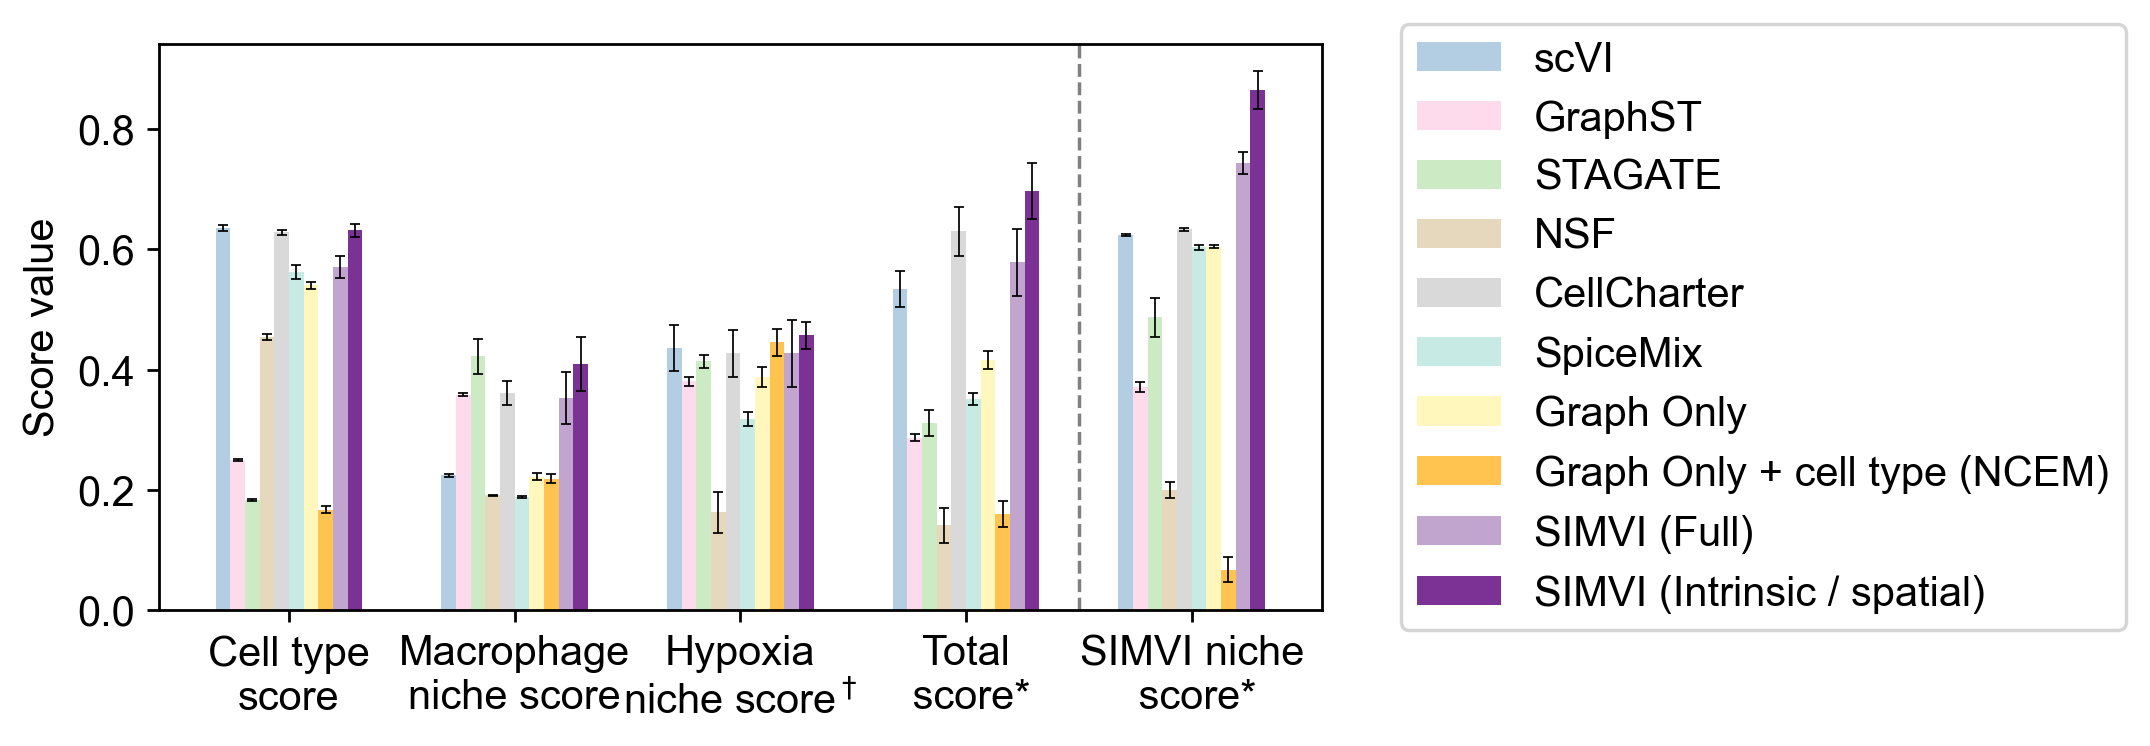

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = 'Arial'
plt.rcParams['figure.dpi'] = 250
plt.rcParams["font.size"] = 12
fig, axs = plt.subplots(figsize=(4,2))
error_bar_style = {'elinewidth': 0.5, 
                   'ecolor': 'black', 
                   'capsize': 1.5,   
                   'capthick': 0.5}   

color_list = ['#b3cde3','#fddaec','#ccebc5','#e5d8bd','#d9d9d9','#c7eae5','#fff7bc','#fec44f','#c2a5cf','#7b3294']
df_summary_mean.T.plot(kind="bar",rot=0,edgecolor='none',color=color_list,figsize=(6,3),ax=axs,yerr=df_summary_ste.T, error_kw=error_bar_style,width=0.65)
#sns.barplot(x=df_summary_mean.index,y='Bio conservation',data=df_summary_mean,ax=axs[0])
#axs.set_ylim(0.2,0.6)
#axs.errorbar(df_summary_mean.index, df_summary_mean['Bio conservation'], yerr=df_summary_std['Bio conservation'], fmt='none', c='black', capsize=2, elinewidth=0.7, capthick=0.7)
#axs.set_xticklabels([])
#axs.set_xlim(-0.5, df_mean.index.shape[0]-0.5)
axs.legend(loc="center left", bbox_to_anchor=(1.05, 0.5))
axs.set_ylabel('Score value')
plt.axvline(x=3.5, color='gray', linestyle='--', linewidth=1)
plt.savefig('multiome_benchmarking_main_updated.pdf',bbox_inches='tight')